In [1]:
from mnist.load_mnist import MNIST

from nn.model import Sequential
from nn.activations import relu, tanh, sigmoid
from nn.layers import Dense
from nn.loss import MeanSquaredError

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
data = MNIST(test_split=0.25)
train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (31500, 784) (31500,)
Test: (10500, 784) (10500,)


In [120]:
X_train[0].shape

(784,)

In [122]:
nn.info()

model: Sequential
Dense | (128,784) | relu
Dense | (10,128) | tanh


In [144]:
from typing import Union


def categorical_encoding(array: Union[np.ndarray, list]) -> np.ndarray:
    len_ = np.max(array) + 1
    initial_shape = array.flatten().shape
    new_shape = (initial_shape[0], len_)
    
    encoded_array = np.empty(new_shape)
    
    for value, row in zip(array, range(initial_shape[0])):
        sample = np.zeros(len_)
        sample[value] = 1.
        
        encoded_array[row] = np.expand_dims(sample, axis=0)
        
    return encoded_array

In [221]:
from typing import List


def transform_input_data(array: np.ndarray) -> np.ndarray:
    return np.array(
        list(
            map(
                lambda sample: sample.reshape(-1, 1), array
                )
            )
        )

In [145]:
a = categorical_encoding(y_train)

7


7

In [170]:
nn = Sequential(input_shape=(1, 784),
                layers=[
                    Dense(128, activation=relu),
                    Dense(10, activation=tanh)],
                loss=MeanSquaredError())

In [202]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [225]:
X_train_ = transform_input_data(X_train)
y_train_ = categorical_encoding(y_train)
y_train_ = transform_input_data(y_train_)

In [219]:
a = np.array(list(map(lambda x: x**2, range(1, 5))))
a

array([ 1,  4,  9, 16])

In [226]:
e = nn.forward(X_train_[0])
e

array([[ 0.0173267 ],
       [-0.04359123],
       [-0.07453472],
       [ 0.22497019],
       [ 0.04569556],
       [ 0.01438473],
       [-0.03272457],
       [ 0.92909368],
       [-0.08877806],
       [ 0.07414348]])

In [227]:
y_train_[0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [247]:
nn.fit(X_train_, y_train_, epochs=10)

Start training for 10 epochs
Epoch : 0 - Loss: 0.002888098308618414
Epoch : 1 - Loss: 0.003075468216141342
Epoch : 2 - Loss: 0.011229997170843033
Epoch : 3 - Loss: 0.0022047614391903234
Epoch : 4 - Loss: 0.09153941230654258
Epoch : 5 - Loss: 0.004303435885888879
Epoch : 6 - Loss: 0.0014082120454302046
Epoch : 7 - Loss: 0.0011895202865857967
Epoch : 8 - Loss: 0.001852082317556725
Epoch : 9 - Loss: 0.0015427447045663362


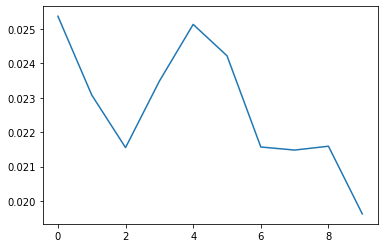

In [258]:
import matplotlib.pyplot as plt

mean_losses = list(map(lambda x: np.mean(x).flatten(), nn.stat['losses']))
plt.plot(range(10), mean_losses)

In [249]:
print(y_train[777])
a = nn.predict(X_train_[777])
np.argmax(a)

0


8

In [250]:
X_test_ = scaler.transform(X_test)
X_test_ = transform_input_data(X_test_)

y_hats = []
for x_i in X_test_:
    y_hat = nn.predict(x_i)
    y_hats.append(np.argmax(y_hat))

In [251]:
cm = confusion_matrix(y_test, y_hats)

<AxesSubplot:>

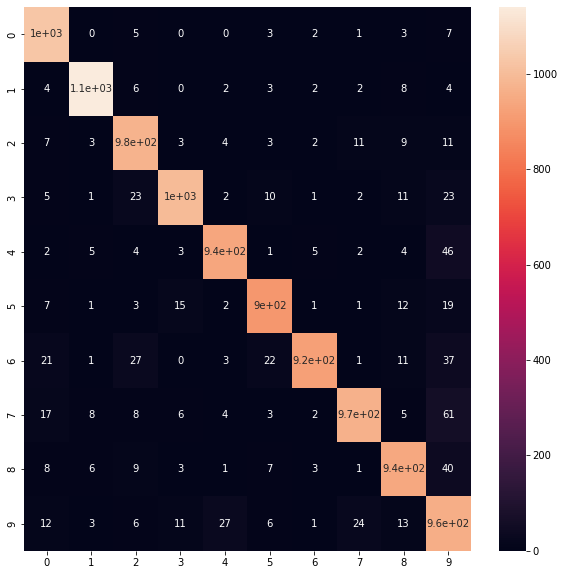

In [265]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [253]:
acc = accuracy_score(y_test, y_hats)
acc

0.9300952380952381